In [93]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

## Jails

Find the counties that have released the highest proportion of their population

In [94]:
jr = pd.read_csv('covid_jail_releases.csv')
jr = jr.iloc[1:,:7] # jail releases

# rename columns for ease of use
jr.rename(columns={'Overall Pop. Reduction / \nTotal Number of Releases':'releases',
                  'Population Prior to Releases':'prior_pop'},
          inplace=True)

# some rows have weird entries (range of values, circa values), remove
jr = jr[jr['releases'].astype(str).apply(lambda x: x.isnumeric())]
jr = jr[jr['prior_pop'].astype(str).apply(lambda x: x.isnumeric())]

# make columns numeric
jr['releases'] = pd.to_numeric(jr['releases'])
jr['prior_pop'] = pd.to_numeric(jr['prior_pop'])

# what fraction of the prior population has been released
jr['frac_reduction'] = jr['releases']/jr['prior_pop']

In [95]:
jr['County'] = jr['County'].replace('DC jail','District of Columbia')
jr['County'] = jr['County'].replace('Prince George\'s','Prince George')
jr = jr[jr['Facility']!='State-wide']

In [96]:
len(jr)

57

In [68]:
jr.sort_values('frac_reduction',ascending = False)

,State,County,Facility,Authorizing Agent,Known Capacity (if available),prior_pop,releases,frac_reduction
28,District of Col,District of Columbia,DC jail,NaN,NaN,1850,1442,0.779459
76,Oregon,Marion,County-wide,NaN,NaN,415,300,0.722892
41,Iowa,Polk,County-wide,NaN,NaN,1000,700,0.700000
77,Oregon,Multnomah,County-wide,"Sheriff, courts",1192.0,1097,739,0.673655
73,Oregon,Douglas,County-wide,NaN,NaN,194,128,0.659794
19,California,San Diego,Ocean View,NaN,NaN,55,34,0.618182
70,Oregon,Washington,County-wide,NaN,NaN,573,300,0.523560
72,Oregon,Deschutes,County-wide,NaN,NaN,289,148,0.512111
99,Wisconsin,Eau Claire,County-wide,Sheriff,NaN,281,143,0.508897
97,Wisconsin,Chippewa,County-wide,Sheriff,NaN,100,50,0.500000


Consider NYT county-level data, look at Marion county

In [71]:
nyt_data = pd.read_csv('NYT_data/us-counties.csv')
nyt_data = nyt_data[nyt_data['county'].isin(list(jr['County'].unique()))]

In [72]:
Marion = nyt_data[(nyt_data['county']=='Marion')&
                  (nyt_data['state']=='Oregon')]
Marion['date'] = pd.to_datetime(Marion['date'])

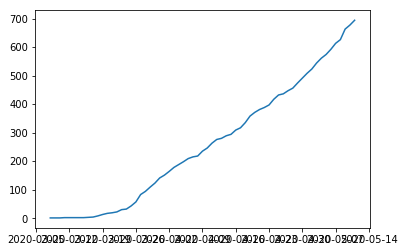

In [62]:
plt.plot(Marion['date'],Marion['cases'])

In [76]:
CA_nyt = nyt_data[nyt_data['state']=='California']
CA_jr = jr[jr['State']=='California']

In [78]:
CA_jr.sort_values('frac_reduction')

,State,County,Facility,Authorizing Agent,Known Capacity (if available),prior_pop,releases,frac_reduction
12,California,Alameda,Santa Rita,Court,NaN,2500,247,0.098800
25,California,Orange,County-wide,Court,NaN,5289,838,0.158442
16,California,Alameda,NaN,NaN,NaN,2500,500,0.200000
20,California,Marin,County jail,Court/others,NaN,270,58,0.214815
17,California,San Francisco,County-wide,Joint Initiative,NaN,1100,260,0.236364
21,California,Monterey,County-wide,NaN,NaN,885,244,0.275706
13,California,Los Angeles,County-wide,NaN,NaN,17076,5193,0.304111
23,California,San Mateo,County-wide,NaN,1500.0,969,382,0.394221
19,California,San Diego,Ocean View,NaN,NaN,55,34,0.618182


(array([737450., 737464., 737478., 737492., 737506., 737520., 737534.,
        737548.]), <a list of 8 Text xticklabel objects>)

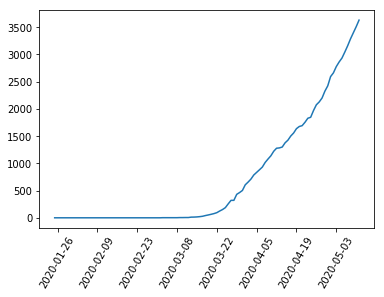

In [92]:
countyname = 'San Diego'
statename = 'California'
County = nyt_data[(nyt_data['county']==countyname)&
                  (nyt_data['state']==statename)]
County['date'] = pd.to_datetime(County['date'])
plt.plot(County['date'],County['cases'])
plt.xticks(rotation=60)

"The San Diego County Sheriff’s Department was expected release approximately 400 inmates without bail Wednesday and Thursday in compliance with a state order to reduce prison populations to prevent the spread of COVID- 19, Sheriff Bill Gore said." (April 15-16)

The new “Zero Bail” emergency order, adopted by the Judicial Council of California last week, stipulates that by 5 p.m. Wednesday, all inmates not charged with a serious or violent offense be released or be in the process of being released with no bail. Gore said he had 500 inmates fitting that description.

In [88]:
jr[jr['State']=='California']

,State,County,Facility,Authorizing Agent,Known Capacity (if available),prior_pop,releases,frac_reduction
12,California,Alameda,Santa Rita,Court,NaN,2500,247,0.098800
13,California,Los Angeles,County-wide,NaN,NaN,17076,5193,0.304111
16,California,Alameda,NaN,NaN,NaN,2500,500,0.200000
17,California,San Francisco,County-wide,Joint Initiative,NaN,1100,260,0.236364
19,California,San Diego,Ocean View,NaN,NaN,55,34,0.618182
20,California,Marin,County jail,Court/others,NaN,270,58,0.214815
21,California,Monterey,County-wide,NaN,NaN,885,244,0.275706
23,California,San Mateo,County-wide,NaN,1500.0,969,382,0.394221
25,California,Orange,County-wide,Court,NaN,5289,838,0.158442


## Prison Systems

In [110]:
pr = pd.read_csv('covid_prison_releases.csv')
pr = pr.iloc[1:,:7]
pr.rename(columns={'Overall Pop. Reduction / \nTotal Number of Releases':'releases',
                  'Population Prior to Releases':'prior_pop'},
          inplace=True)
# some rows have weird entries (range of values, circa values), remove
pr = pr[pr['releases'].astype(str).apply(lambda x: x.isnumeric())]
pr = pr[pr['prior_pop'].astype(str).apply(lambda x: x.isnumeric())]

# make columns numeric
pr['releases'] = pd.to_numeric(pr['releases'])
pr['prior_pop'] = pd.to_numeric(pr['prior_pop'])

# what fraction of the prior population has been released
pr['frac_reduction'] = pr['releases']/pr['prior_pop']

In [113]:
pr.sort_values('frac_reduction',ascending=False)

,State,Facility,Authorizing Agent,Known Capacity (if available),prior_pop,releases,Does the source report this reduction as a result of releases only or a mix of releases/policy changes?,frac_reduction
28,Vermont,Statewide,NaN,NaN,1630,300,Mix,0.184049
12,Maine,Statewide,NaN,NaN,2240,157,Mix,0.070089
21,North Dakota,Statewide,State Parole Board,NaN,1700,56,Releases only,0.032941
15,Massachusetts,Statewide,SJC,NaN,7697,251,Mix,0.032610
23,North Carolina,Statewide,NaN,NaN,34850,1083,Mix,0.031076
2,California,Statewide,CDCR,NaN,114000,3418,Releases only,0.029982
25,Pennsylvania,Statewide,"Governor, DOC",NaN,44500,746,Releases only,0.016764
3,Colorado,Statewide,Governor,NaN,17000,52,Releases only,0.003059
29,Virginia,Statewide,Governor,NaN,30000,62,Releases only,0.002067
17,New Mexico,Statewide,Governor,NaN,6700,11,Releases only,0.001642
